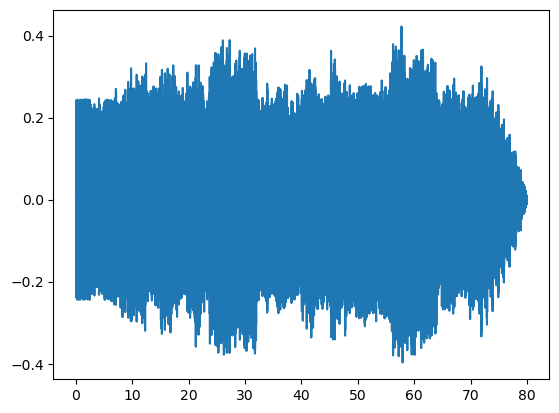

In [ ]:
import numpy as np
from scipy.io.wavfile import write
import sounddevice
import matplotlib.pyplot as plt

samplerate = 44100  # Default sample rate (44.1kHz)
duration = 72+8
###########

###########
t = np.linspace(0,duration, round(samplerate*duration)) # time
sin = lambda x:np.sin(np.pi*2*x) # an easier to use sin function
step = lambda x: np.floor(np.mod(x,2)) # square wave that oscilates between 0 and 1
sig = lambda x : -2/(1+np.exp(x))+1 # sigmoid, used as a simple distortion
MicroFM = lambda t,pow,tones=16: sum([sin(t*n+sin(t*pow*n)*(1+pow))*1/n for n in range(1,tones+1)]) # inharmonic FM oscilator

a=0.01

organ = lambda t: sum([
    0.5*MicroFM(t*80*2**((-12+step(t*1/3)*3+step(t*2/3)*4+step(2/5*t)*(12))/12),1+step(t*1/12)*a)*sin(t*3),
    0.5*MicroFM(t*80*2**((step(t*1/3)*3+step(t*2/3)*4+step(2/5*t)*(-7))/12),1+step(t*1/12)*a)*sin(t*3),
    0.30*MicroFM(t*80*2**((12+step(t*1/3)*3+step(t*5/6)*4+step(2/5*t)*(-7))/12),1+step(t*1/12)*a)*sin(t*2.5)*(np.mod(t*0.5,1)*step(t*1/6)),
    0.35*MicroFM(t*80*2**((12+step(t*1/8+1)*5+step(t*2/3+1)*2+step(3/10*t)*(-7))/12),1+step(t*1/2)*0.01+step(t*1/12)*a)*sin(t*5)*(step(t*1/8)+step(t*1/16)),
    ])

audio = organ((t*step(t*1/72+1)+(np.mod(t,1)+71)*step(t*1/72)))*(step(t*1/72+1)+step(t*1/72)*np.mod(-t*1/8,1)**0.75)
audio *= 0.125

audio_int16 = np.int16(audio * 32767)
write("The shy n ugly organ.wav", samplerate, audio_int16)

# comment this out to hear the music after execution
#sounddevice.play(audio,samplerate)

plt.plot(t,audio)
plt.show()



